# Importing Required Libraries

In [73]:
import numpy as np  
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import confusion_matrix

Loading The Data

In [4]:
df = pd.read_csv("iris.data.csv")

Performing Simple EDA

In [5]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [13]:
df.columns=["sl","sw","pl","pw","species"]

In [14]:
df.head(5)

,sl,sw,pl,pw,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [16]:
df.sample(10)

,sl,sw,pl,pw,species
36,4.9,3.1,1.5,0.1,Iris-setosa
84,6.0,3.4,4.5,1.6,Iris-versicolor
69,5.9,3.2,4.8,1.8,Iris-versicolor
63,5.6,2.9,3.6,1.3,Iris-versicolor
11,4.8,3.0,1.4,0.1,Iris-setosa
145,6.3,2.5,5.0,1.9,Iris-virginica
117,7.7,2.6,6.9,2.3,Iris-virginica
128,7.2,3.0,5.8,1.6,Iris-virginica
118,6.0,2.2,5.0,1.5,Iris-virginica
66,5.8,2.7,4.1,1.0,Iris-versicolor


In [18]:
df["sl"].head()

0    4.9
1    4.7
2    4.6
3    5.0
4    5.4
Name: sl, dtype: float64

In [22]:
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])
df.head()

,sl,sw,pl,pw,species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [24]:
df.sample(10)

,sl,sw,pl,pw,species
25,5.0,3.4,1.6,0.4,0
134,7.7,3.0,6.1,2.3,2
56,4.9,2.4,3.3,1.0,1
45,5.1,3.8,1.6,0.2,0
44,4.8,3.0,1.4,0.3,0
135,6.3,3.4,5.6,2.4,2
96,6.2,2.9,4.3,1.3,1
144,6.7,3.0,5.2,2.3,2
74,6.6,3.0,4.4,1.4,1
113,5.8,2.8,5.1,2.4,2


In [25]:
df.shape

(149, 5)

# Logistic Regression

In [28]:
lgr = LogisticRegression()
x1 = df.iloc[:,0:-1]
x1.head()

,sl,sw,pl,pw
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [32]:
y1 = df.iloc[:,-1]
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

SPLITING THE DATA

In [34]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size = 0.2)

Applying regression

In [35]:
lgr.fit(x_train1,y_train1)

LogisticRegression()

Evaluation

In [40]:
y_pred1 = lgr.predict(x_test1)


Accuracy

In [41]:
accuracy_score(y_test1,y_pred1)

1.0

# Decision Tree

In [44]:
dtc = DecisionTreeClassifier()
x2 = df.iloc[:,0:-1]
y2 = df.iloc[:,-1]
x2.head()

,sl,sw,pl,pw
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [46]:
y2.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [48]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size = 0.2)


In [50]:
dtc.fit(x_train2,y_train2)

DecisionTreeClassifier()

In [52]:
y_pred2 = dtc.predict(x_test2)

In [54]:
y_test2

40     0
114    2
9      0
7      0
47     0
81     1
1      0
46     0
125    2
72     1
98     1
30     0
93     1
65     1
92     1
120    2
121    2
44     0
116    2
62     1
117    2
64     1
147    2
89     1
105    2
28     0
104    2
134    2
18     0
26     0
Name: species, dtype: int64

In [56]:
y_pred2

array([0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1,
       2, 1, 2, 0, 2, 2, 0, 0], dtype=int64)

In [59]:
accuracy_score(y_test2,y_pred2)

1.0

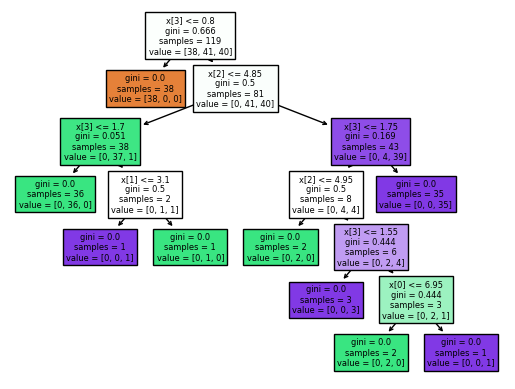

In [63]:
plot_tree(dtc,filled=True)
plt.show()

In [65]:
precision_score(y_test2,y_pred2,average = "macro")

1.0

In [66]:
recall_score(y_test2,y_pred2,average = "macro")

1.0

In [68]:
f1_score(y_test2,y_pred2 , average = "macro")

1.0

In [72]:
confusion_matrix(y_test2,y_pred2)

array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]], dtype=int64)

<Axes: >

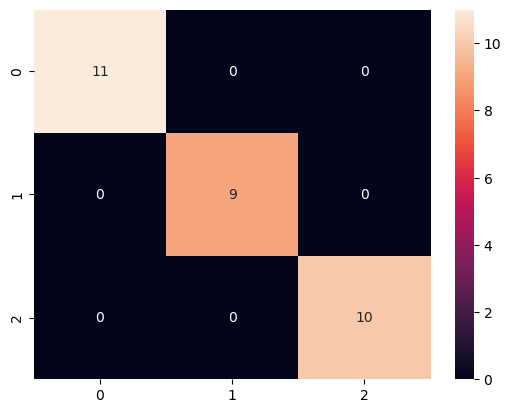

In [74]:
sns.heatmap(confusion_matrix(y_test2,y_pred2),annot=True)